In [2]:
from IPython.display import display, HTML
import pandas as pd
import seaborn as sns
pd.set_option('display.max_rows', 6)
pd.set_option('display.max_columns', 500)
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')
# display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML(open("../shared-resources/jupyter.css", "r").read()))
import mpld3

In [37]:
df = pd.read_csv('../../stocks_w_bitcoin.csv', index_col='date')

In [38]:
type(df.index)

pandas.core.indexes.base.Index

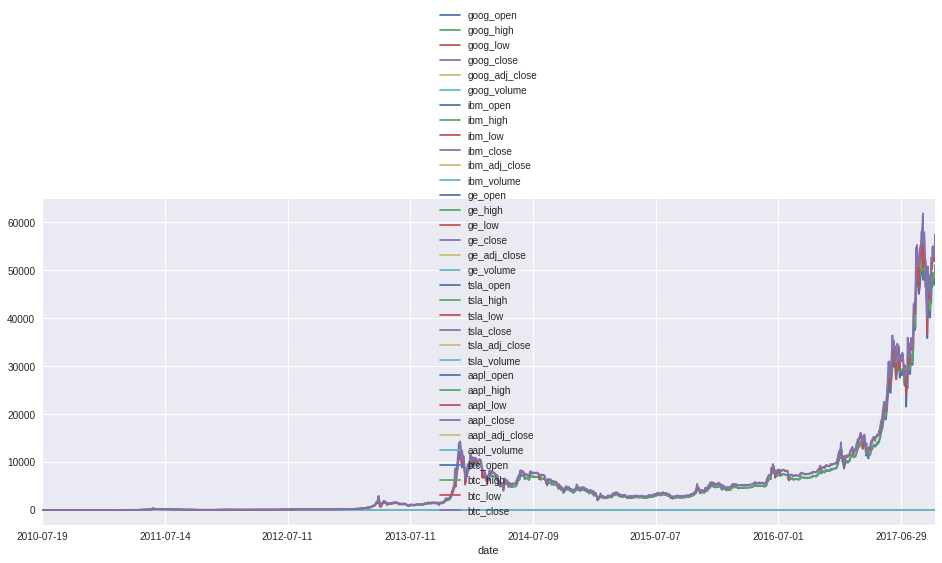

In [48]:
ax = df[[c for c in df.columns]].plot(figsize=(16, 6))
plt.show()

In [42]:
# all quantities in relative change since 2011/07/10 
start_values = df.iloc[0]
df = df / start_values

In [70]:
ax = df[[c for c in df.columns if c.find('open') > 1]].plot(logy=True, figsize=(16, 4))

In [72]:
# mpld3.display(ax.figure)
plt.show()

In [ ]:
df.columns = [col if not col.endswith('adj_close') else col.split('_')[0] + '_adjclose'
              for col in df.columns]
symbols = list(set(col.split('_')[0] for col in df.columns))
for col in df.columns:
    for sym in symbols:
        quantity_name = col.split('_')[-1]
        if quantity_name in ['close', 'open', 'high', 'low']:
            df[col] = df[col] / df[sym + '_' + 'close'].iloc[0]
#         elif quantity_name in ['adjclose']:
#             df[col] = df[col] / df[sym + '_' + 'adjclose'].iloc[0]
        else:
            df[col] = df[col] / df[col].iloc[0]

In [52]:
# Just in case you want to build an interactive dashboard for Elon Musk:
with open('../shared-resources/musk.html', 'w') as fout:
    fout.write(mpld3.fig_to_html(ax.figure))

In [13]:
df[df.index[0]] = start_values
df.to_csv('../shared-resources/time_series/time-series-2010.csv')


Here's a [link to that dashboard](../shared-resources/musk.html)

## Your Turn

1. plot all the closing prices for these stocks
2. create an interactive D3 plot from the figure
3. save the interactactive D3 plot to HTML on your computer
4. interact with your HTML file!

## BONUS

1. Look at my TSLA plot closely (zoom in)
2. What's wrong with the close, open, high, and low prices?
3. Can you normalize the data better than I did so this doesn't happen?
